Fenêtre d'échantillon pour la spline de flottaison 76800
Nombre de points de franchissement positif de la ligne de flottaison 320
Ecart type 0.6257612605423131
Nombre bre de franchissement 319


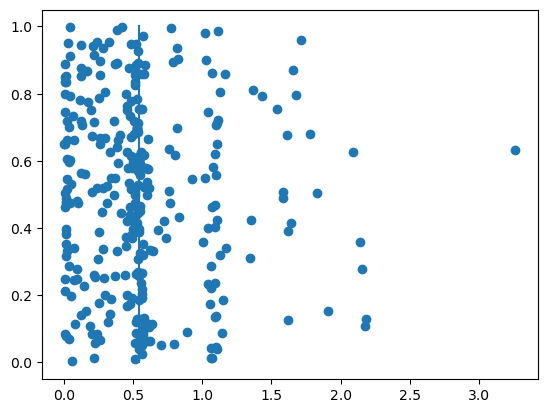

In [1]:
import computebpm as bpm
from importlib import reload 
reload(bpm)
from scipy.io import wavfile # get the api
from scipy.signal  import decimate
import matplotlib.pyplot as plt
import numpy as np

wavpath="content/foreverentier.wav"
SAMPLING_FREQUENCY, data = wavfile.read(wavpath) # load the sampling rate and the audio data
DECIMATION_FACTOR=5
audio = data.T[0] # this is a two channel soundtrack, get the first track
audio=decimate(audio,DECIMATION_FACTOR)
SAMPLING_FREQUENCY=SAMPLING_FREQUENCY//DECIMATION_FACTOR

def exploreFanchissement(audio,SAMPLING_FREQUENCY,lowcut=100,percentileflottaison=85,convolutioninsec=.1,NBSECFLOTTAISON=15):
    audiofranchissement=bpm.applyFilter(audio,SAMPLING_FREQUENCY,lowcut)
    indexes=bpm.getFranchissements(audiofranchissement,SAMPLING_FREQUENCY,percentileflottaison,convolutioninsec,NBSECFLOTTAISON)
    return indexes[0]

indexes=exploreFanchissement(audio,SAMPLING_FREQUENCY,lowcut=40,percentileflottaison=83,convolutioninsec=0.15,NBSECFLOTTAISON=8)
spaces=bpm.getSpaces(indexes,SAMPLING_FREQUENCY)
stddev=np.sqrt(np.sum((spaces-120/122)*(spaces-120/122))/len(spaces))
print ("Ecart type",stddev)
print ("Nombre bre de franchissement",len(spaces))


plt.scatter(spaces,np.random.rand(len(spaces)))
plt.plot([60/111,60/111],[0,1])
#plt.xlim(0,2)


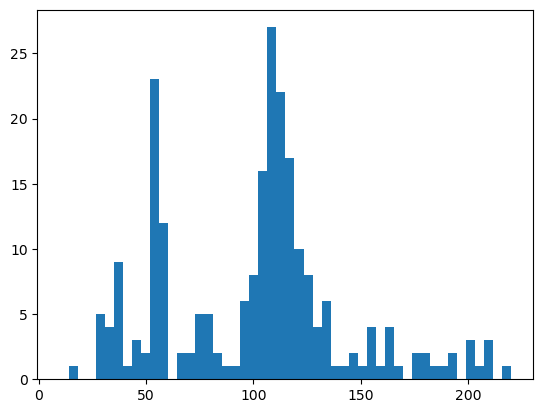

Bpm 217.21308569356094


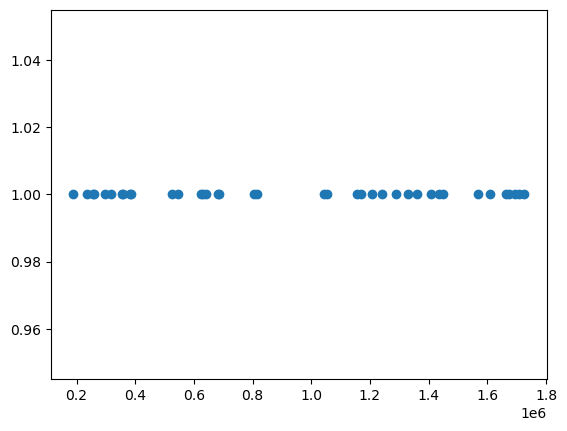

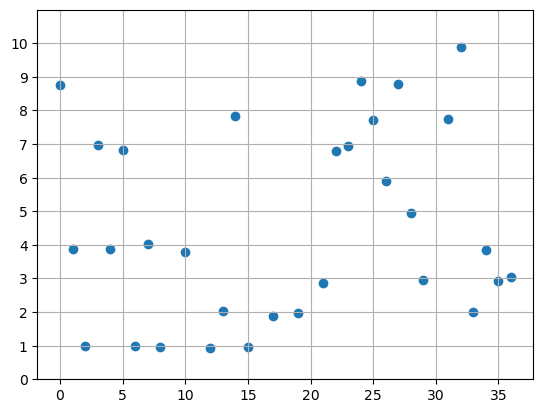

In [10]:
tempos=60/spaces
bins=np.histogram(tempos,bins=50,range=[10,220])
indexmax=np.argmax(bins[0])
min=bins[1][indexmax]
max=bins[1][indexmax+1]
plt.stairs(bins[0], bins[1], fill=True)
plt.show()
bpm=np.mean(tempos[(tempos>min) & (tempos<max)])
print("Bpm",bpm*2)
lowbound=np.argmax(bins[1]>halftempo)
significantbeatindex=((tempos>tempos[indexmax-1])&((tempos<tempos[indexmax+1])))
#significantbeatindex=((tempos>tempos[indexmax-1])&((tempos<tempos[indexmax+1])))|((tempos>tempos[lowbound-1])&((tempos<tempos[lowbound])))
halftempo=bpm/2

lowbound=np.argmax(bins[1]>halftempo)




plt.scatter(indexes[1:][significantbeatindex],np.ones(len(significantbeatindex[significantbeatindex==True])))
spacecomputed=60/bpm
print 
beats=indexes[1:][significantbeatindex]
diffpatt=np.array([1,-1])
diffsp=np.convolve(beats,diffpatt,mode="valid")/SAMPLING_FREQUENCY
plt.show()
plt.scatter([i for i in range(len(diffsp))],diffsp/spacecomputed)
plt.ylim(0,11)
plt.grid()
plt.yticks([i for i in range(0,11,1)])
plt.show()

In [3]:
a=np.log(200/20)/20
b=np.log(20)
b

2.995732273553991

In [20]:
percent=range(60,100,2)
freqs=[np.exp(i*a+b) for i in range(20)]
fenetreflottaisons=range(1,20)
convolutions =[i/40 for i in range(1,20)]
stds=[]
nbpoints=[]
for i in percent:
    indexes=exploreFanchissement(audio,SAMPLING_FREQUENCY,lowcut=40,percentileflottaison=i,convolutioninsec=0.15,NBSECFLOTTAISON=8)
    spaces=bpm.getSpaces(indexes,SAMPLING_FREQUENCY)
    stddev=np.sqrt(np.sum((spaces-120/122)*(spaces-120/122))/len(spaces))
    stds.append(stddev)
    nbpoints.append(np.log(len(spaces)/573))




Fenêtre d'échantillon pour la spline de flottaison 70560
Nombre de points de franchissement positif de la ligne de flottaison 425
Fenêtre d'échantillon pour la spline de flottaison 70560
Nombre de points de franchissement positif de la ligne de flottaison 419
Fenêtre d'échantillon pour la spline de flottaison 70560
Nombre de points de franchissement positif de la ligne de flottaison 410
Fenêtre d'échantillon pour la spline de flottaison 70560
Nombre de points de franchissement positif de la ligne de flottaison 415
Fenêtre d'échantillon pour la spline de flottaison 70560
Nombre de points de franchissement positif de la ligne de flottaison 417
Fenêtre d'échantillon pour la spline de flottaison 70560
Nombre de points de franchissement positif de la ligne de flottaison 401
Fenêtre d'échantillon pour la spline de flottaison 70560
Nombre de points de franchissement positif de la ligne de flottaison 403
Fenêtre d'échantillon pour la spline de flottaison 70560
Nombre de points de franchissemen

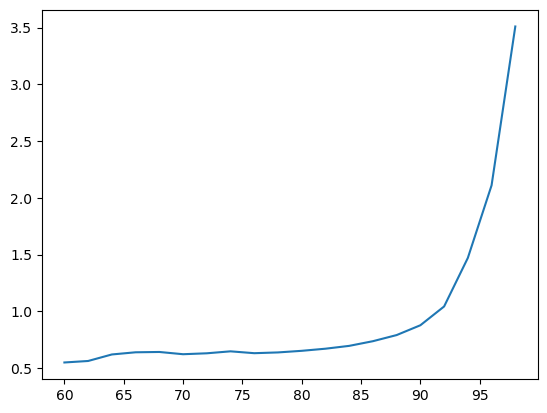

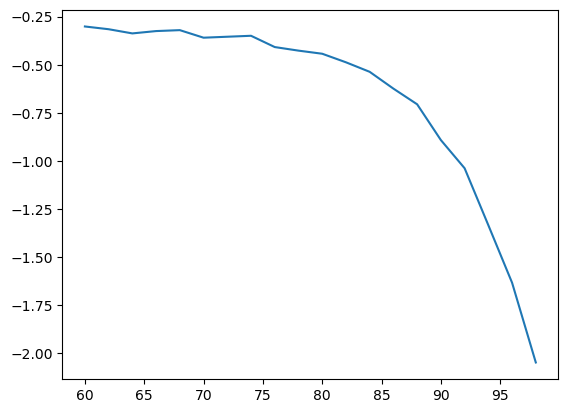

In [21]:
x=freqs
x=fenetreflottaisons
x=convolutions
x=[i for i in percent]

plt.plot(x,stds)
plt.show()
plt.plot(x,nbpoints)